#### First, To Determine The Coorelation Coefficient, You need To Import The Required Packages.
##### As well, I used a function that creates tick marks for Latitude and Longitude

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def label_latlon(ax,lons,lats):
    """ Add tick labels """
    # Define the xticks for longtitude
    ax.set_xticks(lons,crs=ccrs.PlateCarree())
    lon_formatter=cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    # Define ytick for latitude
    ax.set_yticks(lats,crs=ccrs.PlateCarree())
    lat_formatter=cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)

    return

#### I now take the files for the submicron dust emmisions and the Aerosol Optical Thickness (AOT)

In [6]:
file_DUEM001='/scratch/aabramow/dustforclim680/ds_all_DUEM001.nc'
ds_DUEM001=xr.open_dataset(file_DUEM001)

file_DUEXTTFM='/scratch/aabramow/dustforclim680/ds_all_DUEXTTFM.nc'
ds_DUEXTTFM = xr.open_dataset(file_DUEXTTFM)

#### Next, I create a Coorelation Map

In [8]:
r_map = xr.corr(ds_DUEM001['DUEM001'],ds_DUEXTTFM['DUEXTTFM'],dim='time')
r_map

<xarray.DataArray (lat: 361, lon: 576)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0

#### Finally, I create a map that shows the Correlation between Submicron Dust Emission (Bin 001) and Dust Extinction AOT [550 nm] - PM 1.0 um

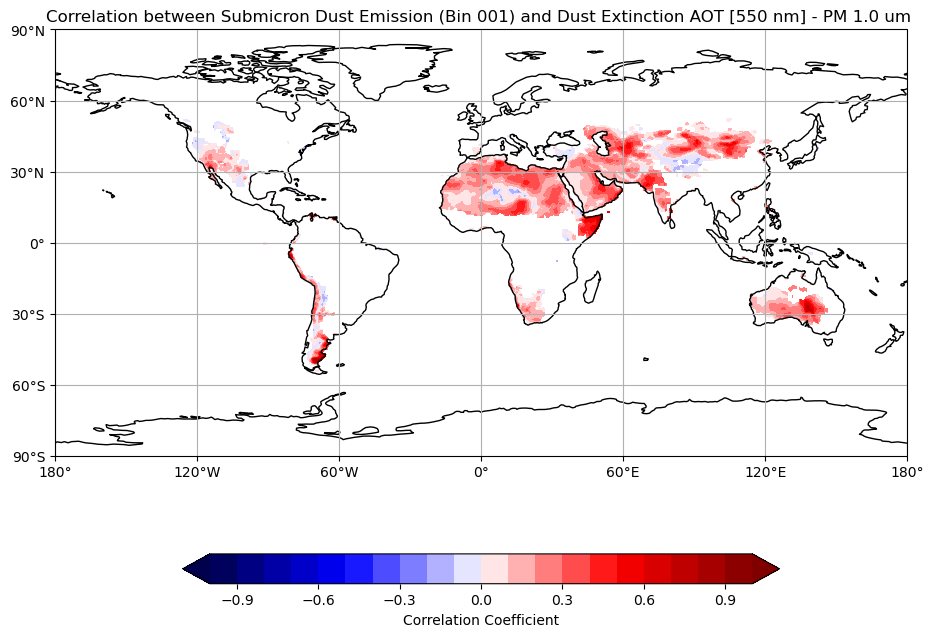

In [11]:
clevs=np.arange(-1,1.1,0.1)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point
data=r_map
data,lon=add_cyclic_point(r_map,coord=ds_DUEXTTFM['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,ds_DUEXTTFM['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='seismic',extend='both')

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

label_latlon(ax,np.arange(-180,181,60),np.arange(-90,91,30))
# Define the xticks for longtitude 
#ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
#lon_formatter=cticker.LongitudeFormatter()
#ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
#ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
#lat_formatter=cticker.LatitudeFormatter()
#ax.yaxis.set_major_formatter(lat_formatter)

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Correlation Coefficient')

# Add title
plt.title('Correlation between Submicron Dust Emission (Bin 001) and Dust Extinction AOT [550 nm] - PM 1.0 um ') ;